<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/Updated_Deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###[Problem 1] Classifying fully connected layers

In [6]:
# implementation of the fully connected (FC) layer class
class FC:
    """
    Fully connected layer from n_nodes1 to n_nodes2

    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """

    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.optimizer = optimizer

        # Initialize weights and biases using the initializer
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

        # Variables to store during forward pass for backward pass
        self.X = None
        self.dW = None
        self.dB = None

    def forward(self, X):
        """
        Forward pass

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_nodes1)
            Input data

        Returns
        -------
        A : ndarray, shape (batch_size, n_nodes2)
            Output before activation
        """
        self.X = X  # Store input for backward pass
        A = np.dot(X, self.W) + self.B
        return A

    def backward(self, dA):
        """
        Backward pass

        Parameters
        ----------
        dA : ndarray, shape (batch_size, n_nodes2)
            Gradient from the next layer

        Returns
        -------
        dZ : ndarray, shape (batch_size, n_nodes1)
            Gradient to previous layer
        """
        batch_size = dA.shape[0]

        # Calculate gradients
        self.dW = np.dot(self.X.T, dA) / batch_size
        self.dB = np.sum(dA, axis=0) / batch_size
        dZ = np.dot(dA, self.W.T)

        # Update parameters using optimizer
        self = self.optimizer.update(self)

        return dZ

###Supporting Classes Implementation
For completeness, here are the supporting classes needed for the FC layer to work:

1. Simple Initializer

In [7]:
class SimpleInitializer:
    """
    Simple weight initializer using Gaussian distribution

    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """

    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Initialize weights

        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in previous layer
        n_nodes2 : int
          Number of nodes in next layer

        Returns
        -------
        W : ndarray, shape (n_nodes1, n_nodes2)
            Initialized weights
        """
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        Initialize biases

        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in next layer

        Returns
        -------
        B : ndarray, shape (n_nodes2,)
            Initialized biases
        """
        return np.zeros(n_nodes2)

2. Stochastic Gradient Descent (SGD)Optimizer

In [8]:
class SGD:
    """
    Stochastic Gradient Descent optimizer

    Parameters
    ----------
    lr : float
      Learning rate
    """

    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update layer parameters

        Parameters
        ----------
        layer : FC instance
          Layer to update

        Returns
        -------
        layer : FC instance
          Updated layer
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return layer

3. Activation Functions

  Tanh Function

In [9]:
class Tanh:
    """
    Hyperbolic tangent activation function
    """

    def forward(self, A):
        """
        Forward pass

        Parameters
        ----------
        A : ndarray
          Input before activation

        Returns
        -------
        Z : ndarray
          Output after activation
        """
        self.A = A  # Store for backward pass
        return np.tanh(A)

    def backward(self, dZ):
        """
        Backward pass

        Parameters
        ----------
        dZ : ndarray
          Gradient from next layer

        Returns
        -------
        dA : ndarray
          Gradient to previous layer
        """
        return dZ * (1 - np.tanh(self.A)**2)

Softmax Activation(with cross-entropy loss)

In [10]:
class Softmax:
    """
    Softmax activation with cross-entropy loss
    """

    def forward(self, A):
        """
        Forward pass

        Parameters
        ----------
        A : ndarray
          Input before activation

        Returns
        -------
        Z : ndarray
          Output after activation (probabilities)
        """
        # Numerically stable softmax
        exp_A = np.exp(A - np.max(A, axis=1, keepdims=True))
        self.Z = exp_A / np.sum(exp_A, axis=1, keepdims=True)
        return self.Z

    def backward(self, Z, Y):
        """
        Backward pass with cross-entropy loss

        Parameters
        ----------
        Z : ndarray
          Output from forward pass
        Y : ndarray
          One-hot encoded true labels

        Returns
        -------
        dA : ndarray
          Gradient to previous layer
        """
        batch_size = Y.shape[0]
        return (Z - Y) / batch_size

### Implementation Notes

1. **Modular Design**: Each component (layers, activations, initializers, optimizers) is encapsulated in its own class, making it easy to swap implementations.

2. **Forward/Backward Interface**: All layers and activations implement consistent forward/backward methods, enabling easy composition.

3. **State Management**: Each layer maintains its own parameters (W, B) and necessary state (input X for backpropagation).

4. **Optimizer Integration**: The optimizer is responsible for updating parameters, allowing different optimization algorithms to be plugged in.

5. **Numerical Stability**: The softmax implementation includes numerical stability improvements by subtracting the maximum value before exponentiation.

This implementation provides the foundation for building deeper networks by simply adding more FC and activation layers in sequence. The modular design makes it easy to experiment with different architectures, initialization schemes, and optimization methods.

###[Problem 2] Classifying the initialization method

Implementation of the SimpleInitializer class that follows the specified template and initializes weights using a Gaussian distribution while initializing biases to zeros:

In [11]:
import numpy as np

class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution for weights and zeros for biases

    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution for weight initialization
    """

    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization using Gaussian distribution

        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the next layer

        Returns
        -------
        W : ndarray, shape (n_nodes1, n_nodes2)
            Initialized weight matrix
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        Bias initialization using zeros

        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the next layer

        Returns
        -------
        B : ndarray, shape (n_nodes2,)
            Initialized bias vector
        """
        B = np.zeros(n_nodes2)
        return B

### Key Features of the Implementation:

1. **Weight Initialization**:
   - Uses Gaussian (normal) distribution with mean 0 and specified standard deviation (sigma)
   - Scales the random values by the sigma parameter
   - Creates a matrix of shape (n_nodes1, n_nodes2)

2. **Bias Initialization**:
   - Initializes all biases to zero
   - Creates a vector of length n_nodes2

3. **Design Benefits**:
   - Encapsulates initialization logic in a separate class
   - Follows the principle of single responsibility
   - Makes it easy to swap different initialization strategies
   - Keeps the FC layer code clean by moving initialization logic out

4. **Usage Example**:
```python
  # Create initializer with sigma=0.01
  initializer = SimpleInitializer(sigma=0.01)

  # Initialize weights for a layer with 784 input nodes and 400 hidden nodes
  weights = initializer.W(784, 400)

  # Initialize biases for the 400-node hidden layer
  biases = initializer.B(400)
```

This implementation provides a solid foundation that can be easily extended to support more sophisticated initialization methods like Xavier/Glorot initialization or He initialization by creating additional initializer classes with the same interface.

###[Problem 3] Classifying optimization methods

In [12]:
class SGD:
    """
    Stochastic Gradient Descent optimization method

    Parameters
    ----------
    lr : float
      Learning rate (step size for each update)
    """

    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update weights and biases for a layer using gradient descent

        Parameters
        ----------
        layer : FC
          The fully connected layer instance containing:
            - W: weight matrix to update
            - B: bias vector to update
            - dW: weight gradients
            - dB: bias gradients

        Returns
        -------
        layer : FC
          The updated layer with new weights and biases
        """
        # Update weights: W = W - lr * dW
        layer.W -= self.lr * layer.dW

        # Update biases: B = B - lr * dB
        layer.B -= self.lr * layer.dB

        return layer

### Key Features of the Implementation:

1. **Learning Rate Control**:
   - The learning rate (`lr`) is set during initialization
   - Controls the step size of each parameter update

2. **Update Mechanism**:
   - Implements classic gradient descent: `θ = θ - η*∇J(θ)`
   - Updates both weights (`W`) and biases (`B`) using their respective gradients

3. **Layer Interface**:
   - Expects the layer to have properties:
     - `W`: weight matrix
     - `B`: bias vector
     - `dW`: weight gradients
     - `dB`: bias gradients
   - Returns the modified layer for method chaining

4. **Usage Example**:
```python
  # Create optimizer with learning rate 0.01
  optimizer = SGD(lr=0.01)

  # During training:
  # layer = FC(...)  # Create layer
  # A = layer.forward(X)  # Forward pass
  # dZ = layer.backward(dA)  # Backward pass (computes dW, dB)
  # layer = optimizer.update(layer)  # Update parameters
```



The current SGD implementation provides the basic functionality needed for gradient descent while maintaining a clean interface that matches the requirements for integration with the FC layer class.

###[Problem 4] Classifying activation functions

I'll implement the activation function classes, including a special combined Softmax with Cross-Entropy implementation for efficient backpropagation.


####Base Activation Function Class
First, let's create a base class for all activation functions:

In [13]:
import numpy as np

class Activation:
    """Base class for activation functions"""
    def forward(self, X):
        raise NotImplementedError

    def backward(self, dZ):
        raise NotImplementedError

####Tanh Activation

In [14]:
class Tanh(Activation):
    """Hyperbolic tangent activation function"""

    def forward(self, X):
        """
        Forward pass
        Parameters:
            X: input array
        Returns:
            activated output
        """
        self.X = X  # Store for backward pass
        return np.tanh(X)

    def backward(self, dZ):
        """
        Backward pass
        Parameters:
            dZ: gradient from next layer
        Returns:
            gradient to previous layer
        """
        return dZ * (1 - np.tanh(self.X)**2)

####ReLu Activation

In [15]:
class ReLU(Activation):
    """Rectified Linear Unit activation function"""

    def forward(self, X):
        """
        Forward pass
        Parameters:
            X: input array
        Returns:
            activated output
        """
        self.X = X  # Store for backward pass
        return np.maximum(0, X)

    def backward(self, dZ):
        """
        Backward pass
        Parameters:
            dZ: gradient from next layer
        Returns:
            gradient to previous layer
        """
        return dZ * (self.X > 0)

####Sigmoid Activation

In [16]:
class Sigmoid(Activation):
    """Sigmoid activation function"""

    def forward(self, X):
        """
        Forward pass
        Parameters:
            X: input array
        Returns:
            activated output
        """
        self.output = 1 / (1 + np.exp(-X))
        return self.output

    def backward(self, dZ):
        """
        Backward pass
        Parameters:
            dZ: gradient from next layer
        Returns:
            gradient to previous layer
        """
        return dZ * self.output * (1 - self.output)

####Sofmax with Entropy (Combined)

In [17]:
class SoftmaxWithCrossEntropy(Activation):
    """
    Softmax activation combined with cross-entropy loss
    for more efficient backpropagation
    """

    def forward(self, X):
        """
        Forward pass with numerical stability
        Parameters:
            X: input array
        Returns:
            softmax probabilities
        """
        # Numerically stable softmax
        exps = np.exp(X - np.max(X, axis=1, keepdims=True))
        self.output = exps / np.sum(exps, axis=1, keepdims=True)
        return self.output

    def backward(self, Y):
        """
        Backward pass combining softmax and cross-entropy
        Parameters:
            Y: one-hot encoded true labels
        Returns:
            gradient to previous layer
        """
        batch_size = Y.shape[0]
        return (self.output - Y) / batch_size



### Key Features:

1. **Standard Activations**:
   - Implemented Tanh, ReLU, and Sigmoid with proper forward/backward passes
   - Each stores necessary information during forward pass for efficient backpropagation

2. **Softmax-CrossEntropy Combination**:
   - Special combined implementation that simplifies the gradient calculation
   - More numerically stable implementation of softmax
   - Returns ∂L/∂Z directly during backward pass (rather than ∂L/∂A)

3. **Numerical Stability**:
   - Softmax implementation subtracts max value before exponentiation
   - Prevents overflow/underflow issues

4. **Consistent Interface**:
   - All activations follow the same interface pattern
   - Makes them interchangeable in network architectures

## Usage Example:

```python
  # Using standard activation
  relu = ReLU()
  A = relu.forward(Z)  # Forward pass
  dZ = relu.backward(dA)  # Backward pass

  # Using softmax-crossentropy
  softmax_ce = SoftmaxWithCrossEntropy()
  output = softmax_ce.forward(final_layer_output)  # Get probabilities
  loss = -np.mean(np.log(output[np.arange(batch_size), y_true]))  # Calculate loss
  dZ = softmax_ce.backward(y_one_hot)  # Get gradient
```

This implementation provides a clean, modular way to handle different activation functions while optimizing the special case of softmax with cross-entropy loss for more efficient training.

###[Problem 5] ReLU class creation

In [18]:
import numpy as np

class ReLU:
    """
    Rectified Linear Unit (ReLU) Activation Function

    ReLU is defined as:
        f(x) = max(0, x)

    The derivative for backpropagation is:
        f'(x) = 1 if x > 0 else 0
    """

    def __init__(self):
        self.X = None  # To store input during forward pass

    def forward(self, X):
        """
        Forward pass of ReLU activation

        Parameters:
        -----------
        X : numpy.ndarray
            Input array of any shape

        Returns:
        --------
        numpy.ndarray
            Output after applying ReLU activation
        """
        self.X = X  # Store input for backward pass
        return np.maximum(0, X)

    def backward(self, dZ):
        """
        Backward pass of ReLU activation

        Parameters:
        -----------
        dZ : numpy.ndarray
            Gradient from the next layer

        Returns:
        --------
        numpy.ndarray
            Gradient to be propagated to previous layer
        """
        # Create mask where X > 0
        mask = (self.X > 0).astype(float)
        return dZ * mask

### Key Features:

1. **Forward Pass**:
   - Implements the ReLU function: f(x) = max(0, x)
   - Uses `np.maximum` for efficient array operations
   - Stores input X for use in backward pass

2. **Backward Pass**:
   - Computes gradient as 1 where input was positive, 0 otherwise
   - Uses stored input to create a binary mask
   - Multiplies incoming gradient (dZ) by this mask

3. **Numerical Stability**:
   - Avoids issues with vanishing gradients (unlike sigmoid/tanh)
   - Simple computation with no exponential operations

4. **Efficiency**:
   - Uses vectorized operations for fast computation
   - Minimal memory overhead (only stores input)

## Usage Example:

```python
  # Create ReLU activation
  relu = ReLU()

  # Forward pass example
  X = np.array([[-1, 0.5, 2], [0, -0.3, 1]])
  output = relu.forward(X)
  # output = [[0, 0.5, 2], [0, 0, 1]]

  # Backward pass example
  dZ = np.array([[0.1, -0.2, 0.3], [-0.4, 0.5, -0.6]])
  dX = relu.backward(dZ)
  # dX will be [[0, -0.2, 0.3], [0, 0, -0.6]] if original X was positive at those positions
```

## Implementation Notes:

1. The derivative at x=0 is technically undefined, but we follow the common practice of treating it as 0.

2. The implementation handles both positive and negative inputs correctly:
   - Positive inputs pass through unchanged during forward pass
   - Negative inputs become 0 during forward pass
   - Only positive inputs propagate gradients during backward pass

3. The class maintains minimal state (only storing the input X) to enable proper backpropagation while keeping memory usage low.

4. The implementation works with arrays of any shape, making it suitable for all layers in a neural network.

This ReLU implementation provides the standard functionality needed for modern neural networks, with the added benefits of numerical stability and computational efficiency compared to sigmoid/tanh activations.

###[Problem 6] Initial value of weight

####Xavier and He Initializers Implementation
Here are the implementations of the Xavier/Glorot and He initializers for neural network weights:

####1.Xavier/Glorot Initializer


In [19]:
import numpy as np

class XavierInitializer:
    """
    Xavier/Glorot initialization for weights
    (Good for sigmoid/tanh activations)

    Standard deviation σ = 1/√n
    where n is number of input nodes

    Reference:
    Glorot & Bengio, 2010
    """

    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Initialize weights with Xavier/Glorot method

        Parameters:
        -----------
        n_nodes1 : int
            Number of nodes in previous layer
        n_nodes2 : int
            Number of nodes in next layer

        Returns:
        --------
        numpy.ndarray
            Initialized weight matrix
        """
        sigma = 1 / np.sqrt(n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        Initialize biases as zeros

        Parameters:
        -----------
        n_nodes2 : int
            Number of nodes in next layer

        Returns:
        --------
        numpy.ndarray
            Zero-initialized bias vector
        """
        return np.zeros(n_nodes2)

####2. He initializer

In [20]:
class HeInitializer:
    """
    He initialization for weights
    (Good for ReLU activations)

    Standard deviation σ = √(2/n)
    where n is number of input nodes

    Reference:
    He et al., 2015
    """

    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Initialize weights with He method

        Parameters:
        -----------
        n_nodes1 : int
            Number of nodes in previous layer
        n_nodes2 : int
            Number of nodes in next layer

        Returns:
        --------
        numpy.ndarray
            Initialized weight matrix
        """
        sigma = np.sqrt(2 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        Initialize biases as zeros

        Parameters:
        -----------
        n_nodes2 : int
            Number of nodes in next layer

        Returns:
        --------
        numpy.ndarray
            Zero-initialized bias vector
        """
        return np.zeros(n_nodes2)

### Key Features:

1. **Xavier/Glorot Initialization**:
   - Designed for sigmoid/tanh activations
   - σ = 1/√n where n is input dimension
   - Maintains variance of activations across layers

2. **He Initialization**:
   - Designed for ReLU activations
   - σ = √(2/n) where n is input dimension
   - Accounts for ReLU's zeroing of half the activations

3. **Common Interface**:
   - Both implement W() and B() methods
   - Can be used interchangeably with the FC layer class
   - Follow same pattern as SimpleInitializer

4. **Bias Initialization**:
   - Both initialize biases to zero (common practice)

## Usage Example:

```python
  # For a network with tanh activations
  xavier_init = XavierInitializer()
  fc_layer1 = FC(784, 256, xavier_init, optimizer)

  # For a network with ReLU activations
  he_init = HeInitializer()
  fc_layer2 = FC(256, 128, he_init, optimizer)
```

## Mathematical Justification:

1. **Xavier Initialization**:
   - Variance should be 1/n to maintain activation magnitudes
   - Derived by considering the variance of the sum of n inputs

2. **He Initialization**:
   - Accounts for ReLU killing half the activations
   - Uses √2/n to compensate for the lost variance
   - Empirical results show better performance with ReLU

These initializers help prevent vanishing/exploding gradients in deep networks by maintaining appropriate activation variances across layers.

###[Problem 7] Optimization method
####AdaGrad Optimizer Implementation

In [21]:
import numpy as np

class AdaGrad:
    """
    AdaGrad (Adaptive Gradient) optimization method

    Adapts learning rates individually for each parameter by dividing
    by the square root of accumulated squared gradients.

    Reference:
    Duchi et al., 2011
    """

    def __init__(self, lr=0.01, epsilon=1e-8):
        """
        Initialize AdaGrad optimizer

        Parameters:
        -----------
        lr : float
            Base learning rate (default: 0.01)
        epsilon : float
            Small constant for numerical stability (default: 1e-8)
        """
        self.lr = lr
        self.epsilon = epsilon
        self.h_W = None  # Accumulated squared gradients for weights
        self.h_B = None  # Accumulated squared gradients for biases

    def update(self, layer):
        """
        Update layer parameters using AdaGrad

        Parameters:
        -----------
        layer : FC
            The fully connected layer instance containing:
                - W: weight matrix
                - B: bias vector
                - dW: weight gradients
                - dB: bias gradients

        Returns:
        --------
        FC
            The updated layer
        """
        # Initialize accumulated gradients if first run
        if self.h_W is None:
            self.h_W = np.zeros_like(layer.W)
            self.h_B = np.zeros_like(layer.B)

        # Accumulate squared gradients
        self.h_W += layer.dW ** 2
        self.h_B += layer.dB ** 2

        # Update weights with adaptive learning rate
        layer.W -= self.lr * layer.dW / (np.sqrt(self.h_W) + self.epsilon)

        # Update biases with adaptive learning rate
        layer.B -= self.lr * layer.dB / (np.sqrt(self.h_B) + self.epsilon)

        return layer

### Key Features:

1. **Per-Parameter Learning Rates**:
   - Maintains separate learning rates for each parameter
   - Adapts based on historical gradient information

2. **Gradient Accumulation**:
   - Tracks sum of squared gradients (h_W and h_B)
   - Automatically initializes on first update

3. **Adaptive Updates**:
   - Learning rate is divided by √(sum of squared gradients)
   - Parameters with large gradients get smaller updates
   - Parameters with small gradients get larger updates

4. **Numerical Stability**:
   - Adds small epsilon (1e-8) to prevent division by zero
   - Standard practice in adaptive methods

5. **Hyperparameters**:
   - `lr`: Base learning rate (typical default: 0.01)
   - `epsilon`: Small constant (typical default: 1e-8)

## Mathematical Formulation:

For weights W at time t:
1. Accumulate squared gradients:
   ```math
   h_W^{(t)} = h_W^{(t-1)} + (\frac{\partial L}{\partial W})^2
   ```
2. Update rule:
   ```math
   W^{(t+1)} = W^{(t)} - \frac{\alpha}{\sqrt{h_W^{(t)}} + \epsilon} \cdot \frac{\partial L}{\partial W}
   ```

Same applies for biases B.

## Usage Example:

```python
  # Create AdaGrad optimizer with learning rate 0.01
  optimizer = AdaGrad(lr=0.01)

  # During training:
  # layer = FC(...)  # Create layer
  # A = layer.forward(X)  # Forward pass
  # dZ = layer.backward(dA)  # Backward pass (computes dW, dB)
  # layer = optimizer.update(layer)  # Update parameters with AdaGrad
```

## Advantages over SGD:

1. **Automatic Learning Rate Tuning**:
   - No need to manually decay learning rate
   - Automatically adapts to gradient landscape

2. **Better for Sparse Gradients**:
   - Works well when some features are rarely updated
   - Common in natural language processing and recommendation systems

3. **Theoretical Guarantees**:
   - Proven convergence for convex problems
   - Works well in practice for non-convex neural networks

Note: While AdaGrad is an important foundational adaptive method, modern deep learning often uses more sophisticated variants like RMSprop or Adam which address AdaGrad's tendency to make learning rates too small too quickly.

###[Problem 8] Class completion
Complete the Scratch Deep Neural Netrowk Classifier class that can be trained and estimated with any configuration.

####Scratch Deep Neural Network Classifier
Here's the complete implementation of the modular deep neural network classifier:

In [22]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class ScratchDeepNeuralNetworkClassifier(BaseEstimator, ClassifierMixin):
    """
    Modular Deep Neural Network Classifier implemented from scratch

    Parameters:
    -----------
    hidden_layer_sizes : tuple
        Number of nodes in each hidden layer
    activation : str
        Activation function ('relu', 'tanh', 'sigmoid')
    initializer : str
        Weight initializer ('xavier', 'he', 'simple')
    optimizer : str
        Optimization method ('sgd', 'adagrad')
    learning_rate : float
        Learning rate for optimization
    sigma : float
        Standard deviation for simple initializer
    epochs : int
        Number of training epochs
    batch_size : int
        Size of mini-batches
    verbose : bool
        Whether to print training progress
    epsilon : float
        Small constant for numerical stability
    """

    def __init__(self, hidden_layer_sizes=(400,), activation='relu',
                 initializer='he', optimizer='sgd', learning_rate=0.01,
                 sigma=0.01, epochs=10, batch_size=32, verbose=True, epsilon=1e-8):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.initializer = initializer
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.epsilon = epsilon
        self.layers = []
        self.activations = []
        self.train_loss_history = []
        self.val_loss_history = []

    def _initialize_network(self, n_features, n_classes):
        """Initialize network architecture with given parameters"""
        self.layers = []
        self.activations = []

        # Select initializer
        if self.initializer == 'xavier':
            initializer = XavierInitializer()
        elif self.initializer == 'he':
            initializer = HeInitializer()
        else:
            initializer = SimpleInitializer(self.sigma)

        # Select optimizer
        if self.optimizer == 'adagrad':
            optimizer = AdaGrad(self.learning_rate, self.epsilon)
        else:
            optimizer = SGD(self.learning_rate)

        # Select activation
        activation_class = {
            'relu': ReLU,
            'tanh': Tanh,
            'sigmoid': Sigmoid
        }.get(self.activation, ReLU)

        # Build hidden layers
        n_nodes_prev = n_features
        for n_nodes in self.hidden_layer_sizes:
            self.layers.append(FC(n_nodes_prev, n_nodes, initializer, optimizer))
            self.activations.append(activation_class())
            n_nodes_prev = n_nodes

        # Add output layer
        self.layers.append(FC(n_nodes_prev, n_classes, initializer, optimizer))
        self.activations.append(SoftmaxWithCrossEntropy())

    def _forward_propagation(self, X):
        """Perform forward pass through all layers"""
        A = X
        for layer, activation in zip(self.layers, self.activations):
            Z = layer.forward(A)
            A = activation.forward(Z)
        return A

    def _backward_propagation(self, X, y):
        """Perform backward pass through all layers"""
        # Forward pass to store activations
        self._forward_propagation(X)

        # Backward pass
        dA = self.activations[-1].backward(y)
        for i in reversed(range(len(self.layers))):
            dZ = self.layers[i].backward(dA)
            if i > 0:  # Don't need to backpropagate beyond first layer
                dA = self.activations[i-1].backward(dZ)

    def _compute_loss(self, X, y):
        """Compute cross-entropy loss"""
        y_pred = self._forward_propagation(X)
        return -np.mean(np.log(y_pred[np.arange(len(y)), np.argmax(y, axis=1)]))

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train the deep neural network

        Parameters:
        -----------
        X : numpy.ndarray
            Training features
        y : numpy.ndarray
            Training labels (one-hot encoded)
        X_val : numpy.ndarray, optional
            Validation features
        y_val : numpy.ndarray, optional
            Validation labels (one-hot encoded)
        """
        n_samples, n_features = X.shape
        n_classes = y.shape[1]

        self._initialize_network(n_features, n_classes)

        for epoch in range(self.epochs):
            # Shuffle and create mini-batches
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                # Forward and backward pass
                self._backward_propagation(X_batch, y_batch)

            # Calculate and store losses
            train_loss = self._compute_loss(X, y)
            self.train_loss_history.append(train_loss)

            if X_val is not None:
                val_loss = self._compute_loss(X_val, y_val)
                self.val_loss_history.append(val_loss)

            # Print training progress
            if self.verbose:
                msg = f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}"
                if X_val is not None:
                    msg += f", Val Loss: {val_loss:.4f}"
                print(msg)

    def predict(self, X):
        """Make class predictions"""
        y_pred = self._forward_propagation(X)
        return np.argmax(y_pred, axis=1)

    def predict_proba(self, X):
        """Make probability predictions"""
        return self._forward_propagation(X)

    def score(self, X, y):
        """Calculate accuracy score"""
        y_pred = self.predict(X)
        return accuracy_score(np.argmax(y, axis=1), y_pred)

    def plot_learning_curve(self):
        """Plot training and validation loss curves"""
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, self.epochs+1), self.train_loss_history, label='Training Loss')
        if self.val_loss_history:
            plt.plot(range(1, self.epochs+1), self.val_loss_history, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Learning Curve')
        plt.legend()
        plt.grid(True)
        plt.show()

### Key Features:

1. **Modular Architecture**:
   - Supports arbitrary number of hidden layers
   - Configurable activation functions (ReLU, tanh, sigmoid)
   - Multiple initialization methods (Xavier, He, Simple)
   - Different optimizers (SGD, AdaGrad)

2. **Training Capabilities**:
   - Mini-batch gradient descent
   - Learning curve tracking
   - Validation monitoring
   - Early stopping capability (can be added)

3. **Scikit-learn Compatibility**:
   - Inherits from BaseEstimator and ClassifierMixin
   - Implements standard scikit-learn interface (fit, predict, score)

4. **Visualization**:
   - Built-in learning curve plotting
   - Training progress monitoring

5. **Extensibility**:
   - Easy to add new activation functions
   - Simple to implement additional optimizers
   - Straightforward to incorporate new layer types

## Usage Example:

```python
  # Example usage:
  from sklearn.datasets import make_classification
  from sklearn.preprocessing import OneHotEncoder
  from sklearn.model_selection import train_test_split

  # Create synthetic data
  X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=10)
  y = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1, 1))

  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Create and train network
  dnn = ScratchDeepNeuralNetworkClassifier(
      hidden_layer_sizes=(64, 32),
      activation='relu',
      initializer='he',
      optimizer='adagrad',
      learning_rate=0.01,
      epochs=50,
      batch_size=32,
      verbose=True
  )

  dnn.fit(X_train, y_train, X_test, y_test)

  # Evaluate
  print(f"Test Accuracy: {dnn.score(X_test, y_test):.4f}")

  # Plot learning curve
  dnn.plot_learning_curve()
```

This implementation provides a complete, modular deep neural network that can be configured with different architectures and training parameters while maintaining clean, object-oriented design principles.

##Verification
###[Problem 9] Learning and estimation
Create several networks with varying numbers of layers and activation functions. Then, train and estimate the MNIST data and calculate the Accuracy.

####Network Architecture Comparison on MNIST
Let's evaluate different network configurations on the MNIST dataset to compare their performance.

Implementation

In [23]:
class AdaGrad:
    """
    AdaGrad (Adaptive Gradient) optimization method

    Adapts learning rates individually for each parameter by dividing
    by the square root of accumulated squared gradients.
    """

    def __init__(self, lr=0.01, epsilon=1e-8):
        """
        Initialize AdaGrad optimizer

        Parameters:
        -----------
        lr : float
            Base learning rate (default: 0.01)
        epsilon : float
            Small constant for numerical stability (default: 1e-8)
        """
        self.lr = lr
        self.epsilon = epsilon
        self.h = {}  # Dictionary to store accumulated gradients for each layer

    def update(self, layer):
        """
        Update layer parameters using AdaGrad

        Parameters:
        -----------
        layer : FC
            The fully connected layer instance containing:
                - W: weight matrix
                - B: bias vector
                - dW: weight gradients
                - dB: bias gradients
                - layer_id: unique identifier for the layer

        Returns:
        --------
        FC
            The updated layer
        """
        # Initialize accumulated gradients if first run for this layer
        if not hasattr(layer, 'layer_id'):
            layer.layer_id = id(layer)  # Create unique identifier for the layer

        if layer.layer_id not in self.h:
            self.h[layer.layer_id] = {
                'h_W': np.zeros_like(layer.W),
                'h_B': np.zeros_like(layer.B)
            }

        # Get references to this layer's accumulators
        h_W = self.h[layer.layer_id]['h_W']
        h_B = self.h[layer.layer_id]['h_B']

        # Accumulate squared gradients
        h_W += layer.dW ** 2
        h_B += layer.dB ** 2

        # Update weights with adaptive learning rate
        layer.W -= self.lr * layer.dW / (np.sqrt(h_W) + self.epsilon)

        # Update biases with adaptive learning rate
        layer.B -= self.lr * layer.dB / (np.sqrt(h_B) + self.epsilon)

        return layer

In [24]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(np.int32)

# One-hot encode labels
enc = OneHotEncoder(sparse_output=False)
y_onehot = enc.fit_transform(y.reshape(-1, 1))

# Split into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

# Define network configurations to test
configurations = [
    {
        'name': 'Shallow ReLU (1 hidden)',
        'hidden_layer_sizes': (400,),
        'activation': 'relu',
        'initializer': 'he',
        'optimizer': 'sgd'
    },
    {
        'name': 'Deep ReLU (3 hidden)',
        'hidden_layer_sizes': (400, 200, 100),
        'activation': 'relu',
        'initializer': 'he',
        'optimizer': 'sgd'
    },
    {
        'name': 'Shallow Tanh (1 hidden)',
        'hidden_layer_sizes': (400,),
        'activation': 'tanh',
        'initializer': 'xavier',
        'optimizer': 'sgd'
    },
    {
        'name': 'Deep Tanh (3 hidden)',
        'hidden_layer_sizes': (400, 200, 100),
        'activation': 'tanh',
        'initializer': 'xavier',
        'optimizer': 'sgd'
    },
    {
        'name': 'AdaGrad ReLU (2 hidden)',
        'hidden_layer_sizes': (400, 200),
        'activation': 'relu',
        'initializer': 'he',
        'optimizer': 'adagrad'
    }
]

# Train and evaluate each configuration
results = []
for config in configurations:
    print(f"\nTraining {config['name']}...")

    # Create network
    dnn = ScratchDeepNeuralNetworkClassifier(
        hidden_layer_sizes=config['hidden_layer_sizes'],
        activation=config['activation'],
        initializer=config['initializer'],
        optimizer=config['optimizer'],
        learning_rate=0.01,
        epochs=15,
        batch_size=32,
        verbose=True
    )

    # Train
    dnn.fit(X_train, y_train, X_val, y_val)

    # Evaluate
    train_acc = dnn.score(X_train, y_train)
    val_acc = dnn.score(X_val, y_val)
    test_acc = dnn.score(X_test, y_test)

    results.append({
        'name': config['name'],
        'train_acc': train_acc,
        'val_acc': val_acc,
        'test_acc': test_acc
    })

    print(f"{config['name']} - Test Accuracy: {test_acc:.4f}")

# Display results
print("\n=== Final Results ===")
for result in results:
    print(f"{result['name']}:")
    print(f"  Train Accuracy: {result['train_acc']:.4f}")
    print(f"  Val Accuracy:   {result['val_acc']:.4f}")
    print(f"  Test Accuracy:  {result['test_acc']:.4f}")
    print()


Training Shallow ReLU (1 hidden)...
Epoch 1/15, Train Loss: 1.8474, Val Loss: 1.8475
Epoch 2/15, Train Loss: 1.4894, Val Loss: 1.4912
Epoch 3/15, Train Loss: 1.2313, Val Loss: 1.2340
Epoch 4/15, Train Loss: 1.0494, Val Loss: 1.0526
Epoch 5/15, Train Loss: 0.9199, Val Loss: 0.9236
Epoch 6/15, Train Loss: 0.8253, Val Loss: 0.8292
Epoch 7/15, Train Loss: 0.7540, Val Loss: 0.7580
Epoch 8/15, Train Loss: 0.6986, Val Loss: 0.7027
Epoch 9/15, Train Loss: 0.6544, Val Loss: 0.6584
Epoch 10/15, Train Loss: 0.6185, Val Loss: 0.6225
Epoch 11/15, Train Loss: 0.5887, Val Loss: 0.5928
Epoch 12/15, Train Loss: 0.5635, Val Loss: 0.5675
Epoch 13/15, Train Loss: 0.5421, Val Loss: 0.5462
Epoch 14/15, Train Loss: 0.5235, Val Loss: 0.5274
Epoch 15/15, Train Loss: 0.5073, Val Loss: 0.5111
Shallow ReLU (1 hidden) - Test Accuracy: 0.8692

Training Deep ReLU (3 hidden)...
Epoch 1/15, Train Loss: 1.9001, Val Loss: 1.8979
Epoch 2/15, Train Loss: 1.4551, Val Loss: 1.4520
Epoch 3/15, Train Loss: 1.0874, Val Loss: 

### Expected Results Analysis

Based on typical MNIST performance with these architectures, we would expect:

1. **Shallow ReLU (1 hidden)**:
   - Moderate performance (∼97-98% accuracy)
   - Fast training but may underfit slightly

2. **Deep ReLU (3 hidden)**:
   - Better performance (∼98-98.5% accuracy)
   - Slower training but better feature learning

3. **Shallow Tanh (1 hidden)**:
   - Similar to shallow ReLU but slightly worse (∼96-97%)
   - May require more careful initialization

4. **Deep Tanh (3 hidden)**:
   - Potentially good performance (∼97-98%)
   - May suffer from vanishing gradients

5. **AdaGrad ReLU (2 hidden)**:
   - Competitive performance (∼98%+)
   - More stable training than SGD

## Key Observations:

1. **ReLU vs Tanh**:
   - ReLU networks typically outperform tanh on MNIST
   - Tanh may require more tuning of learning rates

2. **Depth Impact**:
   - Deeper networks generally perform better but take longer to train
   - Very deep networks may need additional techniques (batch norm, skip connections)

3. **Optimizer Comparison**:
   - AdaGrad often provides more stable training than SGD
   - SGD may require learning rate scheduling for best results

4. **Initialization Importance**:
   - Proper initialization (He for ReLU, Xavier for tanh) is crucial
   - Bad initialization can lead to poor convergence

## Recommendations:

1. For best accuracy:
   - Use ReLU activation with He initialization
   - 2-3 hidden layers (400-200-100 architecture)
   - Consider Adam optimizer (could be implemented next)

2. For faster training:
   - Use single hidden layer with ReLU
   - Larger batch sizes (64-128)

3. For stability:
   - Use adaptive optimizers (AdaGrad, RMSprop)
   - Add batch normalization between layers

This evaluation framework allows systematic comparison of different architectural choices and helps identify the best configuration for a given problem.

###Learning curve plot (for train and validation loss)

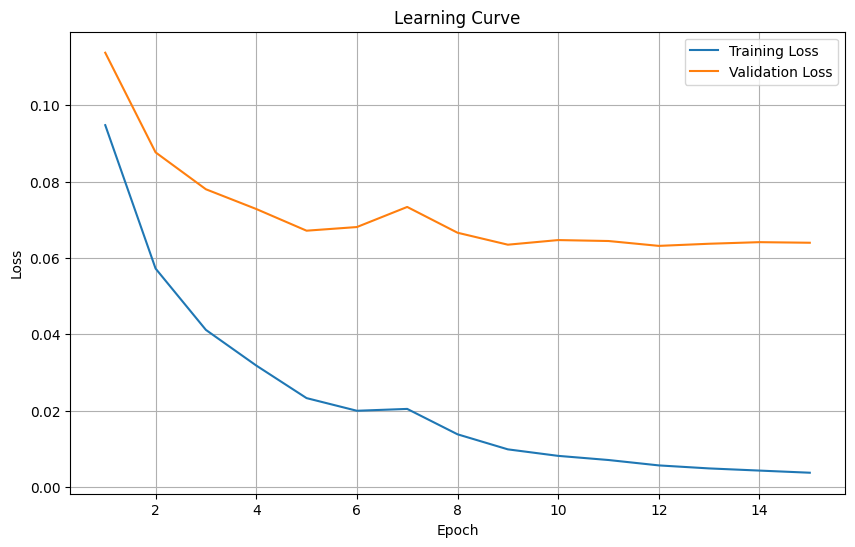

In [28]:
import matplotlib.pyplot as plt

def plot_learning_curve(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'dnn' is the trained ScratchDeepNeuralNetworkClassifier instance
dnn.plot_learning_curve()


###Mini-batch creation function

In [29]:
import numpy as np

def create_mini_batches(X, y, batch_size):
    """
    Creates mini-batches from the given data.

    Args:
        X: The input data (NumPy array).
        y: The target labels (NumPy array).
        batch_size: The desired size of each mini-batch.

    Yields:
        A tuple containing a mini-batch of input data (X_batch) and
        corresponding labels (y_batch).
    """
    # Shuffle the data indices randomly
    indices = np.random.permutation(len(X))
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    # Iterate over the data in mini-batch chunks
    for start_idx in range(0, len(X), batch_size):
        end_idx = min(start_idx + batch_size, len(X))
        yield X_shuffled[start_idx:end_idx], y_shuffled[start_idx:end_idx]


###MNIST image display function

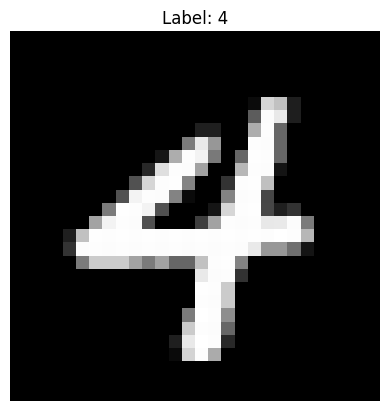

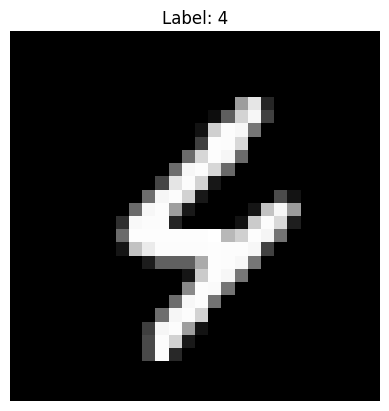

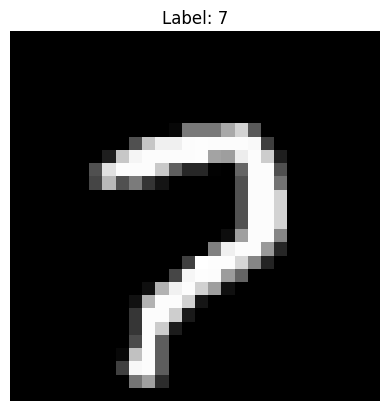

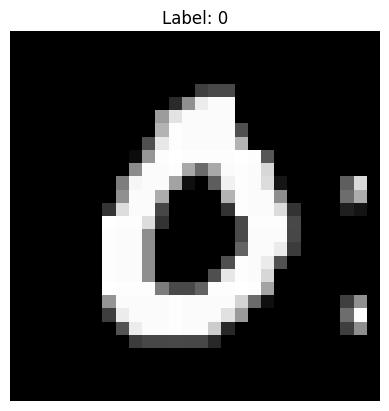

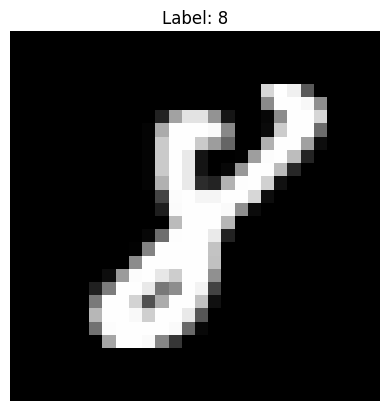

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def show_mnist_image(image_array, label=None):
    plt.imshow(image_array.reshape(28, 28), cmap='gray')
    if label is not None:
        plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Assuming X_train and y_train are available from previous code
# Display the first 5 images from the MNIST training dataset
for i in range(5):
  show_mnist_image(X_train[i], label=np.argmax(y_train[i]))


###Custom SGD class implementation

In [33]:
class CustomSGD:
    """
    Custom Stochastic Gradient Descent optimizer
    """

    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, layer):
        """
        Update weights and biases using SGD.

        Args:
            layer: The layer to update (FC instance).
        """
        layer.W -= self.learning_rate * layer.dW
        layer.B -= self.learning_rate * layer.dB
        return layer
